*What is a loan prediction system?*               
A mechanism called the Loan Prediction System allows you to apply for loans and receive notifications when they are approved. By the data provided by the applicant, the system notifies the applicant of the loan's availability.   

#LoadId = Unique Id   
#Gender = Male/Female    
#Married = Yes/No    
#Dependents = 0/1 (if there are dependent on the applicants eg- child, spouse, parents)    
#Education = Graduate/Not Graduate   
#Self_Employed = No/Yes.   
#ApplicantIncome = how much the applicant earn 
#CoapplicantIncome = how much the coapplicant from family earn 
#LoanAmount = how much loan is approved  
#Loan_Amount_term = how long is the loan given for in Days  
#Credit_history = credit history of the applicant   
#Property_Area = Urban/Rural/Semiurban   
#Loan_Status = is the loan approved - this is the dependent feature

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

data_set = pd.read_csv("loan.csv")


### Display top 10 records in the Dataset

In [36]:
data_set.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Find the number of rows and columns of the Dataset 

In [37]:
data_set.shape

(614, 13)

### Display the information about the column values

In [38]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Observations 
- There are Object, Float and int type data which means we will have to handle these types separately.  
- There are missing values in some columns.  
- No cardianity observed. 
- Loan_ID is unique ID and should be droped. 

In [39]:
data_set = data_set.drop('Loan_ID', axis=1)

In [40]:
data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Find the number of missing data in each column

In [41]:
data_set.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### For the columns with missing data, check the distribution of the object values

In [42]:
def find_value_counts(column_name):
    print("\n**" + column_name + "**")
    print(data_set[column_name].value_counts())
    

In [43]:
find_value_counts('Gender')
find_value_counts('Married')
find_value_counts('Dependents')
find_value_counts('Self_Employed')
find_value_counts('Credit_History')


**Gender**
Male      489
Female    112
Name: Gender, dtype: int64

**Married**
Yes    398
No     213
Name: Married, dtype: int64

**Dependents**
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Self_Employed**
No     500
Yes     82
Name: Self_Employed, dtype: int64

**Credit_History**
1.0    475
0.0     89
Name: Credit_History, dtype: int64


#### Observations 
- We can see that these categorical distributions are imbalanced hence we can fill the missing values with Mode. 

### Fill NaN categorical feature values with mode

In [44]:
# Funtion to define - fill nan values with mode values of the column specified
def fill_na_with_mode(column_name):
    data_set[column_name] = data_set[column_name].fillna(data_set[column_name].mode()[0])
    find_value_counts(column_name)

In [45]:
# Funtion to define - fill nan values with Mean values of the column specified

def fill_na_with_mean(column_name):
    data_set[column_name] = data_set[column_name].fillna(data_set[column_name].mean())
    return print("null value:", data_set[column_name].isnull().sum())

In [46]:
fill_na_with_mode('Gender')
fill_na_with_mode('Married')
fill_na_with_mode('Dependents')
fill_na_with_mode('Self_Employed')
fill_na_with_mode('Credit_History')



**Gender**
Male      502
Female    112
Name: Gender, dtype: int64

**Married**
Yes    401
No     213
Name: Married, dtype: int64

**Dependents**
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Self_Employed**
No     532
Yes     82
Name: Self_Employed, dtype: int64

**Credit_History**
1.0    525
0.0     89
Name: Credit_History, dtype: int64


### Now we have to fill the NaN for 2 float datatype features, LoanAmount and Loan_Amount_Term

- We check the distribution for these columns. 

<Axes: xlabel='LoanAmount', ylabel='Count'>

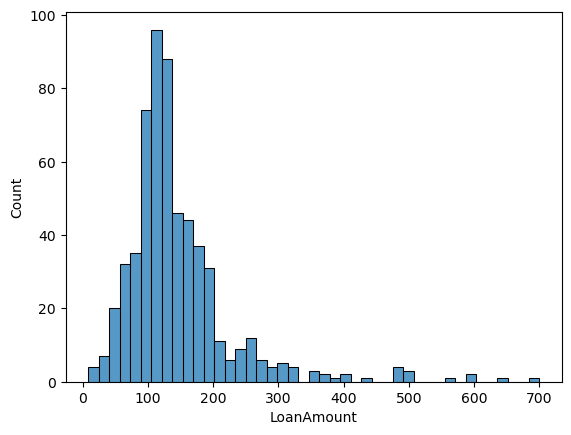

In [47]:
sbn.histplot(data=data_set['LoanAmount'])

In [48]:
data_set['LoanAmount'].mean()

146.41216216216216

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

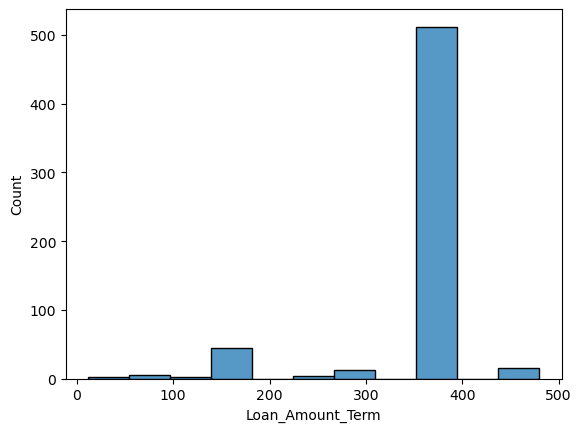

In [49]:
sbn.histplot(data=data_set['Loan_Amount_Term'])

In [50]:
data_set['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### Observation 
- For NAN values in LoanAmount column we can fill the Nan values with Mean
- For Loan_Amount_Term, it's seen that the type are currently set as float but it can be of changed to int type and 
  can be determined as discreate feature values. Also, from the distribution we would like to replace the missing values with 360. ((( I will want to see the Nan relation with the dataset also)))

### Find the corelation 

In [51]:
data_set[data_set['Loan_Amount_Term'].isnull()].head(20)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


#### I don't see any correlation between the Loan_Amount_Term as Null with other columns, hence replacing it with Mode

In [52]:
fill_na_with_mode('Loan_Amount_Term')


**Loan_Amount_Term**
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [53]:
fill_na_with_mean('LoanAmount')

null value: 0


In [54]:
data_set.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

####  We have now handled the missing values. 
#### Next step - is to understand the corealtion between the columns. 

### Steps before finding the correlations, handle the categorical columns. 

In [55]:
def find_uniquevalue_count(df, column):
   print("***", column, df[column].unique())


In [56]:
find_uniquevalue_count(data_set, 'Gender')
find_uniquevalue_count(data_set, 'Married')
find_uniquevalue_count(data_set, 'Dependents')
find_uniquevalue_count(data_set, 'Education')
find_uniquevalue_count(data_set, 'Self_Employed')
find_uniquevalue_count(data_set, 'Credit_History')
find_uniquevalue_count(data_set, 'Loan_Status')
find_uniquevalue_count(data_set, 'Property_Area')


*** Gender ['Male' 'Female']
*** Married ['No' 'Yes']
*** Dependents ['0' '1' '2' '3+']
*** Education ['Graduate' 'Not Graduate']
*** Self_Employed ['No' 'Yes']
*** Credit_History [1. 0.]
*** Loan_Status ['Y' 'N']
*** Property_Area ['Urban' 'Rural' 'Semiurban']


In [57]:
data_set['Dependents'] = data_set['Dependents'].replace(to_replace ='3+', value = 3)


In [58]:
data_set['Gender'] = data_set['Gender'].map({'Male':1, 'Female':0}).astype(int)
data_set['Married'] = data_set['Married'].map({'No':0, 'Yes':1}).astype(int)
data_set['Dependents'] = data_set['Dependents'].map({'0':0, '1':1, '2':2, 3:3}).astype(int)
data_set['Education'] = data_set['Education'].map({'Graduate':0, 'Not Graduate':1}).astype(int)
data_set['Self_Employed'] = data_set['Self_Employed'].map({'No':0, 'Yes':1}).astype(int)
data_set['Credit_History'] = data_set['Credit_History'].map({0.:0, 1.:1}).astype(int)
data_set['Loan_Status'] = data_set['Loan_Status'].map({'N':0, 'Y':1}).astype(int)
data_set['Property_Area'] = data_set['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(int)


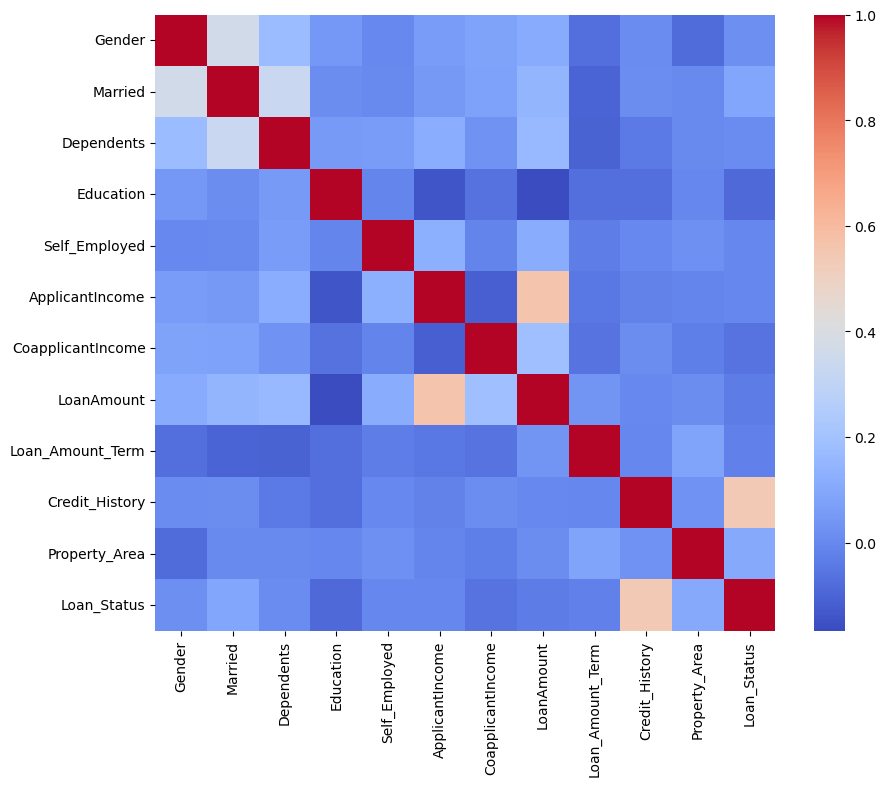

In [59]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data_set.corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

#### from the above graph, it's evident that Loan_status is correlated to the Credit_history. And LoanAmount is correlated to ApplicantIncome, and talking about Income, coAplicantIncome shows not strong relation with the Loan_amount. 

### Separate dependent and independent features

In [60]:
X = data_set.drop('Loan_Status', axis=1)
Y = data_set['Loan_Status']

### Split training and test data

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=42)

### Feature scaling for columns which are not in same range 

In [62]:
data_set.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,0,1


In [63]:
columns_to_fscale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [64]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[columns_to_fscale]=st.fit_transform(X[columns_to_fscale])
X_train[columns_to_fscale] = st.fit_transform(X_train[columns_to_fscale])
X_test[columns_to_fscale] = st.transform(X_test[columns_to_fscale])

In [65]:
X_train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
397,1,1,0,0,0,-0.469608,0.132622,-0.593655,0.352049,1,0
254,1,0,0,0,1,1.926222,-0.815164,0.421235,0.352049,0,0
217,1,1,0,0,0,-0.343808,0.337900,-0.216994,0.352049,1,2
4,1,0,0,0,0,0.068217,-0.815164,-0.112367,0.352049,1,0
256,1,0,0,1,0,0.076374,-0.815164,-0.384399,0.352049,0,1


### Train models and find the accuracy of the prediction 

In [66]:
# We write a function to call different models and check the score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

model_df = {}
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test, y_pred)}")
    
def crossval_score(model, X, Y):
    score = cross_val_score(model,X,Y,cv=5)
    print(f"{model} cv score is {np.mean(score)}")
    

In [67]:
# Beacause the dependent feature (Loan_Status) is Binary value, we will perform classification models 

In [68]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
train_model(lr, X_train, X_test, y_train, y_test)
crossval_score(lr, X, Y)

LogisticRegression() accuracy is 0.7723577235772358
LogisticRegression() cv score is 0.8078368652538984


In [69]:
# SVC

from sklearn import svm
svc = svm.SVC()
train_model(svc, X_train, X_test, y_train, y_test)
crossval_score(svc, X, Y)


SVC() accuracy is 0.7703252032520326
SVC() cv score is 0.7964147674263627


In [70]:
# Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
train_model(dtc, X_train, X_test, y_train, y_test)
crossval_score(dtc, X, Y)

DecisionTreeClassifier() accuracy is 0.6991869918699187
DecisionTreeClassifier() cv score is 0.7020525123284019


In [71]:
# Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
train_model(rfc, X_train, X_test, y_train, y_test)
crossval_score(rfc, X, Y)

RandomForestClassifier() accuracy is 0.7865853658536586
RandomForestClassifier() cv score is 0.7850459816073571


In [72]:
# Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
train_model(rfc, X_train, X_test, y_train, y_test)
crossval_score(rfc, X, Y)

RandomForestClassifier() accuracy is 0.7845528455284553
RandomForestClassifier() cv score is 0.7883113421298147
